In [12]:
import numpy as np
import random
from collections import namedtuple, deque

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym
import cv2
import matplotlib.pyplot as plt


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# CNN Preprocessing 

Preprocessing of the DQN CNN:
- 1. cropping the image (makes only sense if we know that several parts are not needed... maybe as a extra step if one does know specifications! DO LATER - if needed!)

- 2. Resizing the image 
- 3. grayscaling the image

In [4]:
env = gym.make("Pong-v0")

In [11]:
state = env.reset()
print(state.shape)

(210, 160, 3)


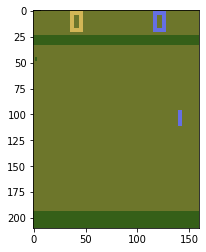

In [8]:
plt.imshow(state)

# Cropping the image

(157, 140, 3)


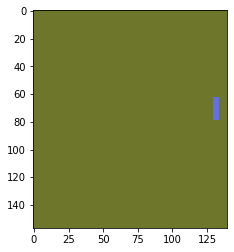

In [17]:
cropped = state[33:190, 10:150]
plt.imshow(cropped)
print(cropped.shape)

# Resizing

(64, 64, 3)


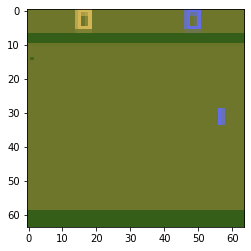

In [64]:
resized = cv2.resize(state, (64,64))
plt.imshow(resized)
print(resized.shape)

# Grayscaling

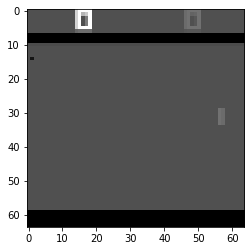

In [65]:
gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")


# Stacking

In [66]:
print(gray.shape)
gray = gray.reshape((1,64,64))
print(gray.shape)

(64, 64)
(1, 64, 64)


In [67]:
stacked = np.vstack([gray, gray, gray, gray])

In [68]:
stacked.shape

(4, 64, 64)

In [71]:
# adding new state 
new_state = np.ones((1,64,64))

In [77]:
added = stacked[:3,:,:]
added = np.concatenate((new_state, added))
print(added.shape)

(4, 64, 64)


# Building the CNN for the DQN